# Inspection de datasets : analyse de fichiers NIfTI

Ce chapitre explore comment explorer et analyser des fichiers NIfTI (Neuroimaging Informatics Technology Initiative), un format courant en imagerie médicale et neuroscience. Les fichiers NIfTI peuvent contenir des images 3D, 4D ou plus.

---

## Concepts clés

- **Format NIfTI** : conteneur standard pour les images volumétriques
- **Affine matrix** : transformation spatiale en coordonnées réelles
- **Dimensions et voxels** : structure des données 3D
- **Inspection récursive** : naviguer dans les dossiers pour découvrir les données
- **Visualisation multi-plan** : afficher des coupes selon différents axes

In [1]:
# Importation des bibliothèques
import os
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

# Importer les fonctions utilitaires personnalisées
from utils import split_name_with_nii, get_slice, get_nifti_data, get_nifti_header_info, summarize_intensities

# Configurer NumPy pour afficher les nombres sans notation scientifique
np.set_printoptions(suppress=True)

---

## Navigation récursive et inspection des fichiers NIfTI

La fonction `os.walk()` permet de naviguer récursivement dans une arborescence de dossiers pour découvrir tous les fichiers NIfTI. Pour chaque fichier, on extrait les métadonnées et on visualise des coupes.


Fichier : data/bids/anat/sub-X_ses-Y_T2star.nii.gz


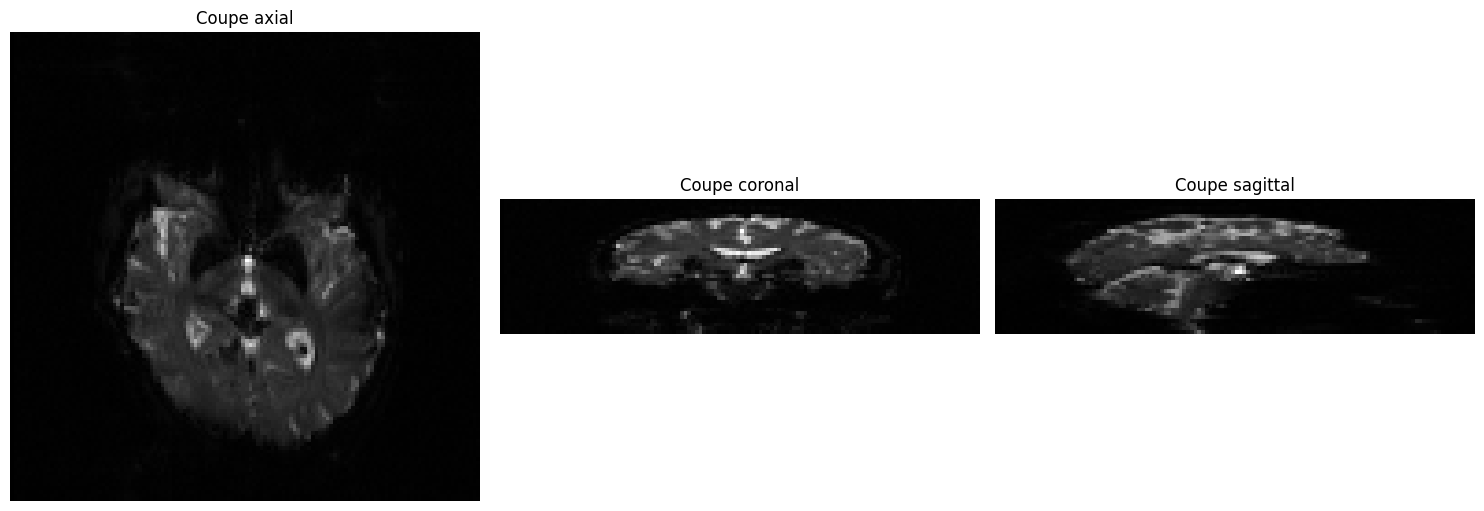


Matrice affine :
[[  -1.791    0.103   -0.272  123.452]
 [   0.123    1.746   -1.128  -67.176]
 [  -0.072    0.411    4.864 -119.187]
 [   0.       0.       0.       1.   ]]
Dimensions (voxels) : [128 128  36]
Taille des voxels (mm) : [1.797 1.797 5.   ]
Ordre des axes : LAS
Type de données : int16
Statistiques des intensités :
(np.int64(589824), np.int64(582727), np.float64(84.724), np.float64(189.939), np.float64(20.0), np.float64(15.0), np.int16(2668), np.int16(1))

Fichier : data/bids/anat/sub-X_ses-Y_T2w.nii.gz


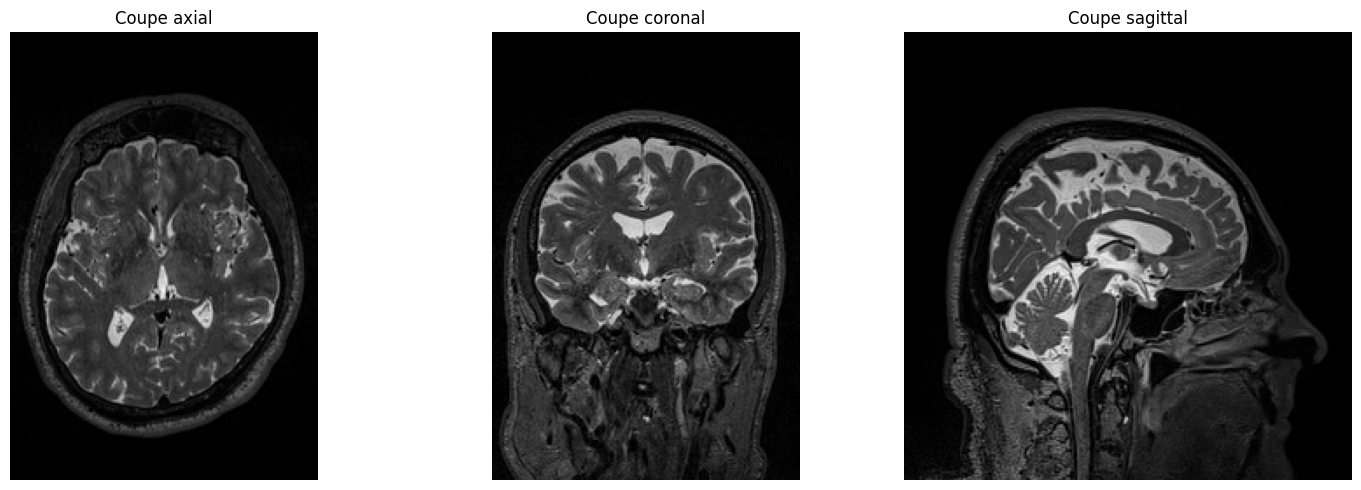


Matrice affine :
[[   0.997    0.057   -0.054  -77.061]
 [  -0.068    0.972   -0.226  -57.864]
 [   0.04     0.229    0.973 -168.827]
 [   0.       0.       0.       1.   ]]
Dimensions (voxels) : [176 256 256]
Taille des voxels (mm) : [1. 1. 1.]
Ordre des axes : RAS
Type de données : int16
Statistiques des intensités :
(np.int64(11534336), np.int64(9618564), np.float64(44.515), np.float64(61.987), np.float64(8.0), np.float64(75.0), np.int16(531), np.int16(1))

Fichier : data/bids/anat/sub-X_ses-Y_acq-TOF_angio.nii.gz
Statistiques des intensités :
(np.int64(11534336), np.int64(9618564), np.float64(44.515), np.float64(61.987), np.float64(8.0), np.float64(75.0), np.int16(531), np.int16(1))

Fichier : data/bids/anat/sub-X_ses-Y_acq-TOF_angio.nii.gz


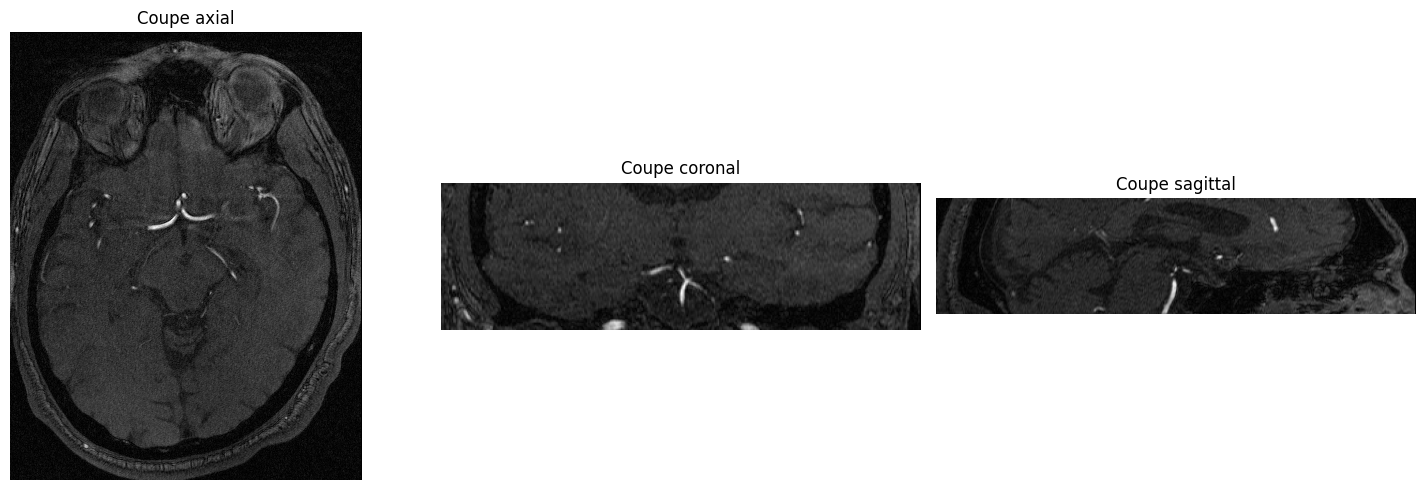


Matrice affine :
[[  0.444   0.035  -0.037 -72.222]
 [ -0.04    0.429  -0.17  -50.486]
 [  0.015   0.119   0.626 -86.706]
 [  0.      0.      0.      1.   ]]
Dimensions (voxels) : [352 448 108]
Taille des voxels (mm) : [0.446 0.446 0.65 ]
Ordre des axes : RAS
Type de données : int16
Statistiques des intensités :
(np.int64(17031168), np.int64(16936281), np.float64(81.52), np.float64(52.232), np.float64(90.0), np.float64(92.0), np.int16(815), np.int16(1))

Fichier : data/bids/anat/sub-X_ses-Y_acq-TSE_T2w.nii.gz
Statistiques des intensités :
(np.int64(17031168), np.int64(16936281), np.float64(81.52), np.float64(52.232), np.float64(90.0), np.float64(92.0), np.int16(815), np.int16(1))

Fichier : data/bids/anat/sub-X_ses-Y_acq-TSE_T2w.nii.gz


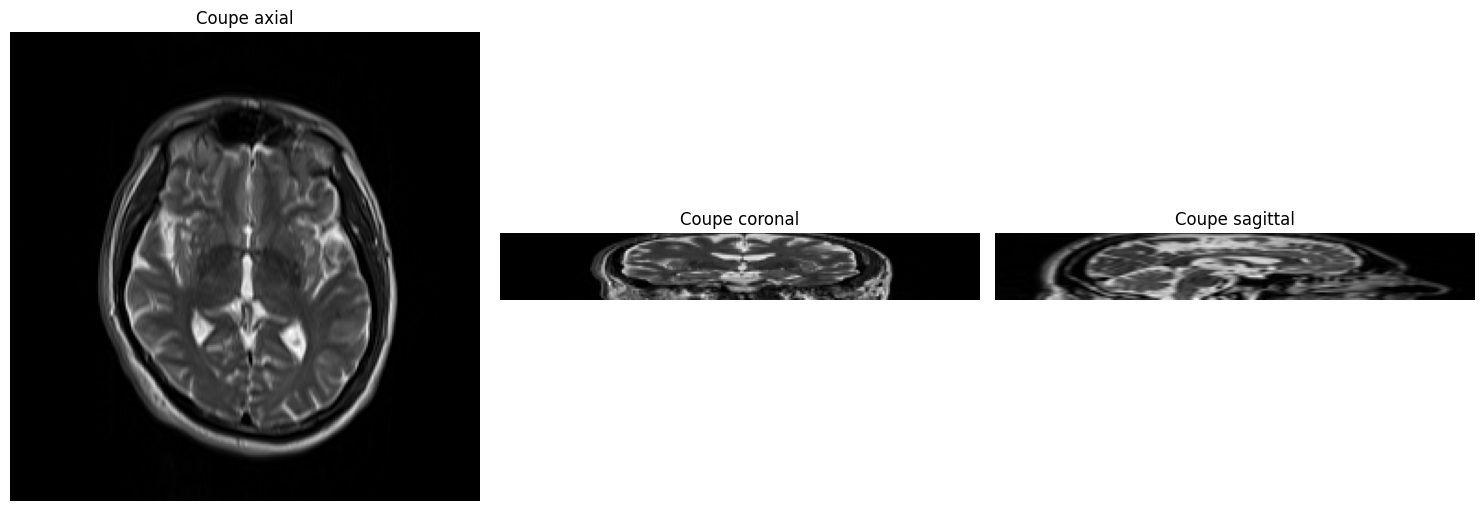


Matrice affine :
[[  -0.997    0.057   -0.217  134.669]
 [   0.068    0.972   -0.902  -85.419]
 [  -0.04     0.229    3.891 -104.8  ]
 [   0.       0.       0.       1.   ]]
Dimensions (voxels) : [256 256  36]
Taille des voxels (mm) : [1. 1. 4.]
Ordre des axes : LAS
Type de données : int16
Statistiques des intensités :
(np.int64(2359296), np.int64(2160803), np.float64(146.039), np.float64(239.794), np.float64(6.0), np.float64(257.0), np.int16(1768), np.int16(1))

Fichier : data/bids/anat/sub-X_ses-Y_T1w.nii.gz
Statistiques des intensités :
(np.int64(2359296), np.int64(2160803), np.float64(146.039), np.float64(239.794), np.float64(6.0), np.float64(257.0), np.int16(1768), np.int16(1))

Fichier : data/bids/anat/sub-X_ses-Y_T1w.nii.gz


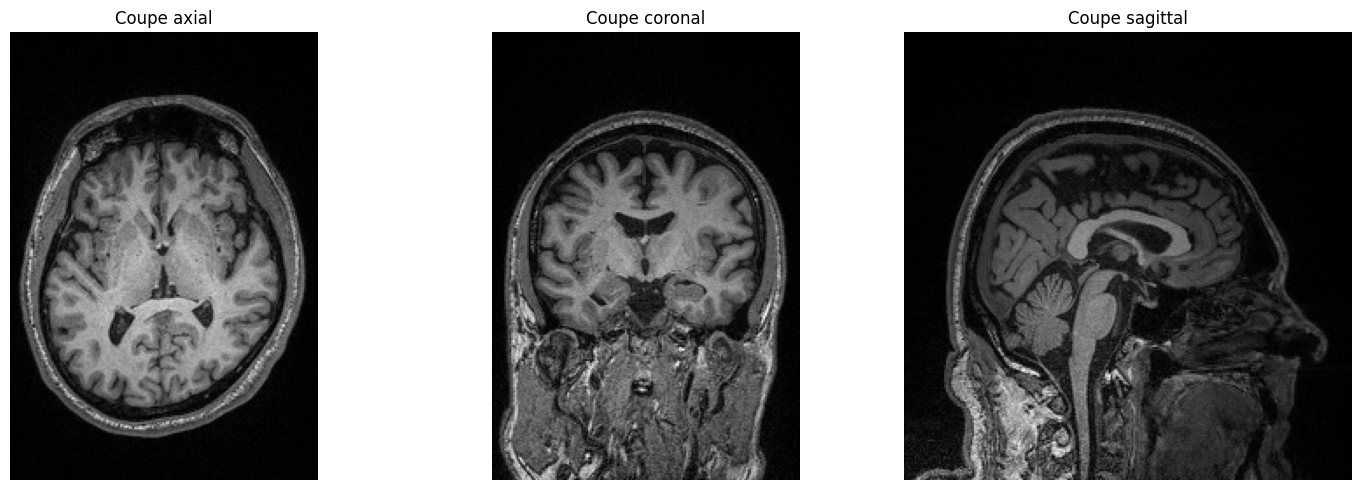


Matrice affine :
[[   0.997    0.057   -0.054  -77.06 ]
 [  -0.068    0.972   -0.226  -57.856]
 [   0.04     0.229    0.973 -168.833]
 [   0.       0.       0.       1.   ]]
Dimensions (voxels) : [176 256 256]
Taille des voxels (mm) : [1. 1. 1.]
Ordre des axes : RAS
Type de données : int16
Statistiques des intensités :
(np.int64(11534336), np.int64(11108812), np.float64(70.111), np.float64(97.752), np.float64(11.0), np.float64(124.0), np.int16(718), np.int16(1))

Fichier : data/bids/func/sub-X_ses-Y_task-rest_run-01_bold.nii.gz
Statistiques des intensités :
(np.int64(11534336), np.int64(11108812), np.float64(70.111), np.float64(97.752), np.float64(11.0), np.float64(124.0), np.int16(718), np.int16(1))

Fichier : data/bids/func/sub-X_ses-Y_task-rest_run-01_bold.nii.gz


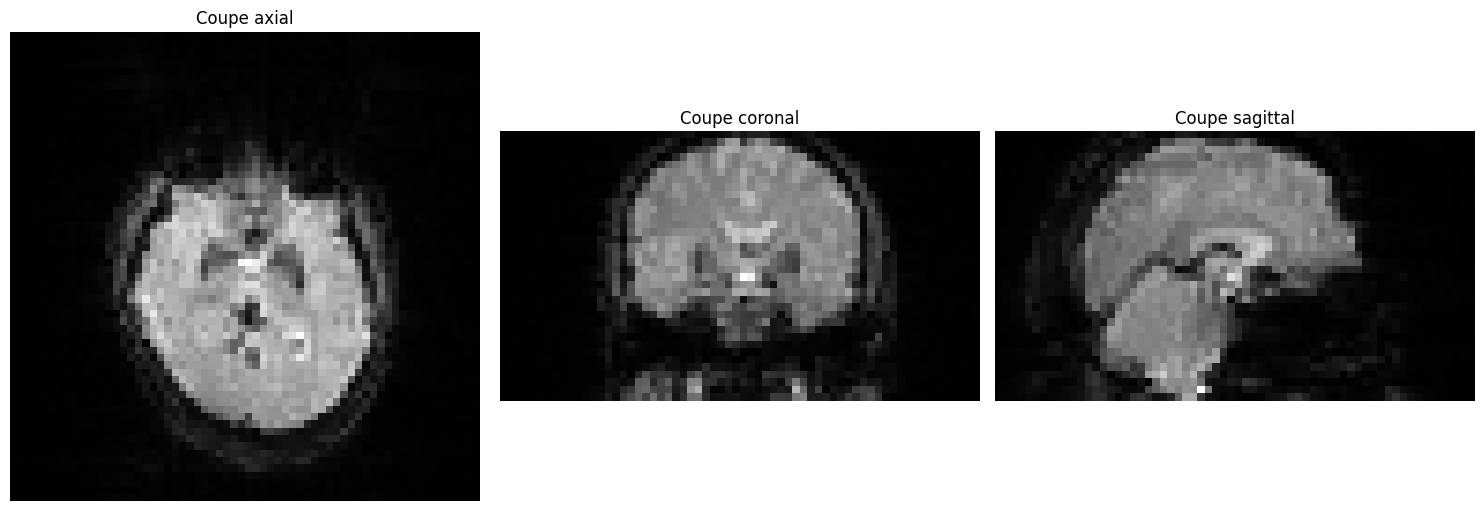


Matrice affine :
[[  -3.988    0.229   -0.217  134.852]
 [   0.273    3.887   -0.902  -82.493]
 [  -0.159    0.914    3.891 -104.112]
 [   0.       0.       0.       1.   ]]
Dimensions (voxels) : [64 64 36]
Taille des voxels (mm) : [4. 4. 4.]
Ordre des axes : LAS
Type de données : int16
Statistiques des intensités :
(np.int64(147456), np.int64(145087), np.float64(93.436), np.float64(180.043), np.float64(10.0), np.float64(48.0), np.int16(1143), np.int16(1))
Dimension 4D (nombre de volumes) : 164

Fichier : data/bids/func/sub-X_ses-Y_task-rest_run-02_bold.nii.gz


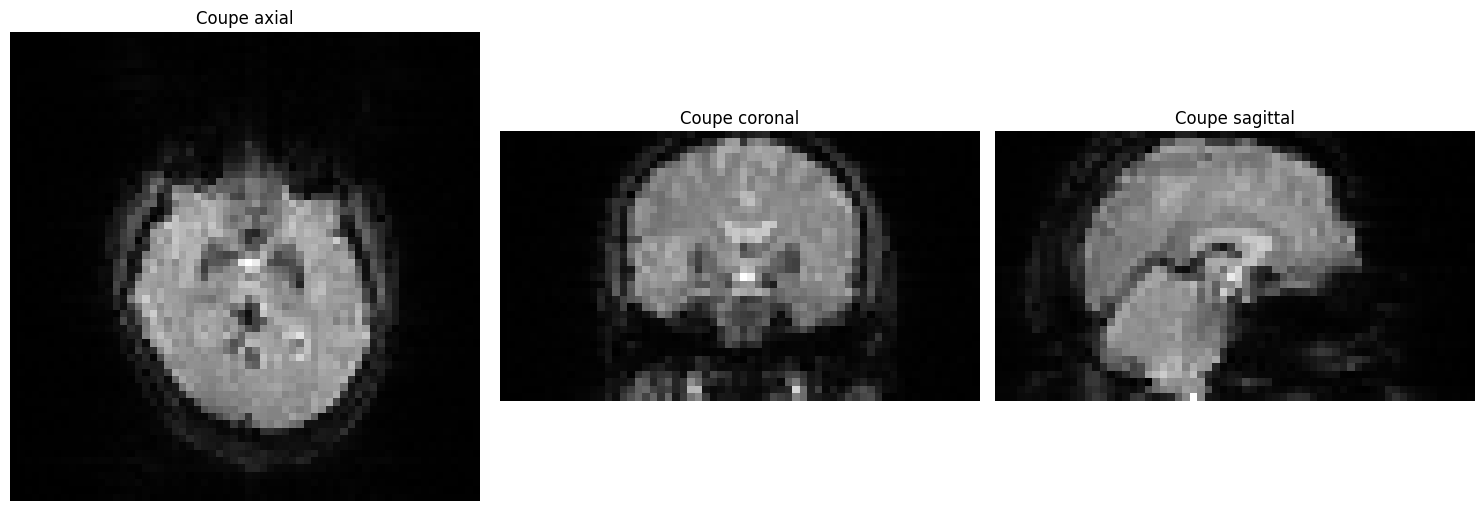


Matrice affine :
[[  -3.988    0.229   -0.217  134.852]
 [   0.273    3.887   -0.902  -82.493]
 [  -0.159    0.914    3.891 -104.112]
 [   0.       0.       0.       1.   ]]
Dimensions (voxels) : [64 64 36]
Taille des voxels (mm) : [4. 4. 4.]
Ordre des axes : LAS
Type de données : int16
Statistiques des intensités :
(np.int64(147456), np.int64(145094), np.float64(94.761), np.float64(181.726), np.float64(10.0), np.float64(49.0), np.int16(1227), np.int16(1))
Dimension 4D (nombre de volumes) : 164

Fichier : data/bids/dwi/sub-X_ses-Y_run-01_dwi_mask.nii.gz


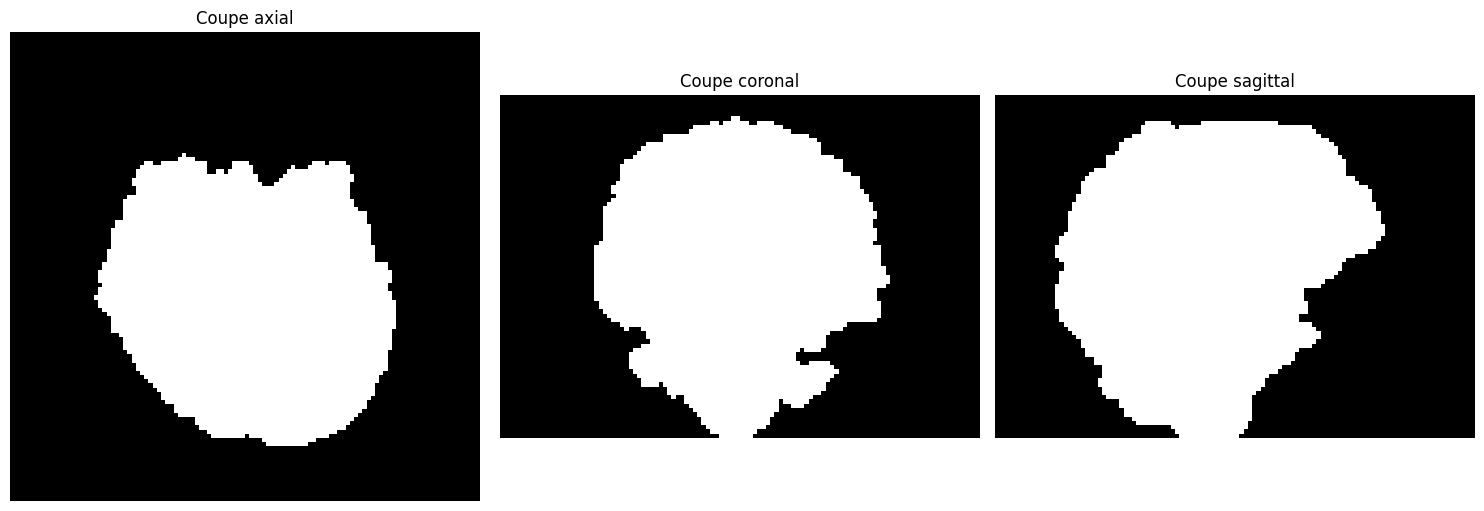


Matrice affine :
[[ -2.      0.     -0.    119.762]
 [ -0.      2.     -0.    -83.18 ]
 [  0.      0.      2.    -90.13 ]
 [  0.      0.      0.      1.   ]]
Dimensions (voxels) : [112 112  80]
Taille des voxels (mm) : [2. 2. 2.]
Ordre des axes : LAS
Type de données : uint8
Statistiques des intensités :
(np.int64(1003520), np.int64(194616), np.float64(1.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.uint8(1), np.uint8(1))

Fichier : data/bids/dwi/sub-X_ses-Y_run-02_dwi_mask.nii.gz


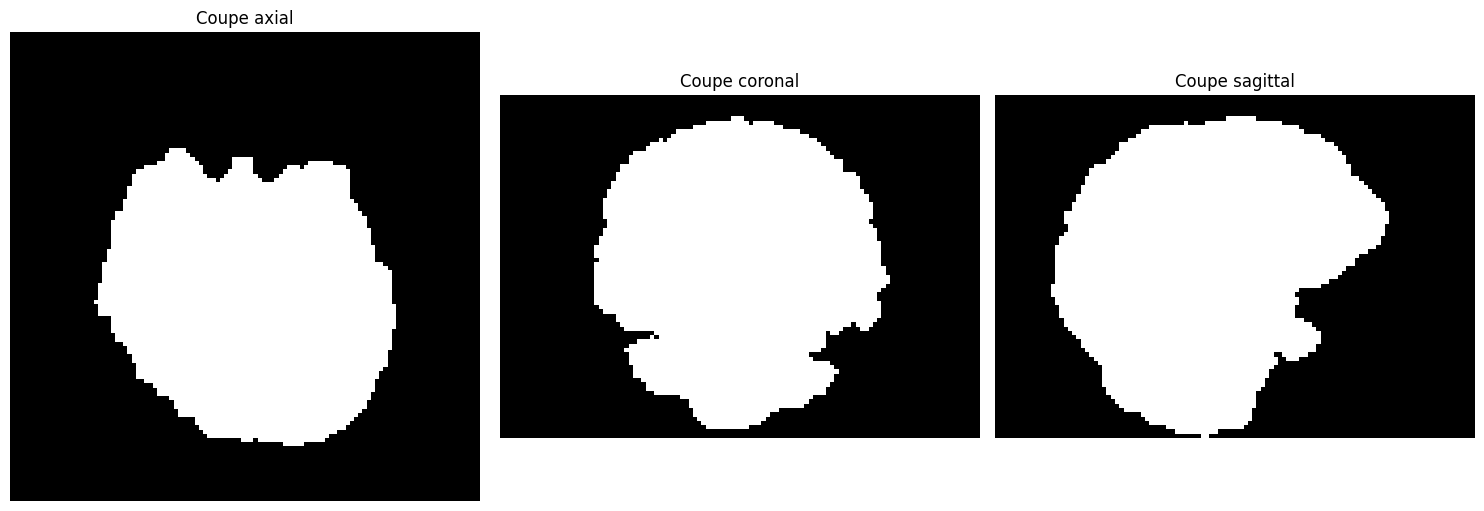


Matrice affine :
[[ -2.      0.     -0.    119.762]
 [ -0.      2.     -0.    -83.18 ]
 [  0.      0.      2.    -90.13 ]
 [  0.      0.      0.      1.   ]]
Dimensions (voxels) : [112 112  80]
Taille des voxels (mm) : [2. 2. 2.]
Ordre des axes : LAS
Type de données : uint8
Statistiques des intensités :
(np.int64(1003520), np.int64(195113), np.float64(1.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.uint8(1), np.uint8(1))

Fichier : data/bids/dwi/sub-X_ses-Y_run-02_dwi.nii.gz


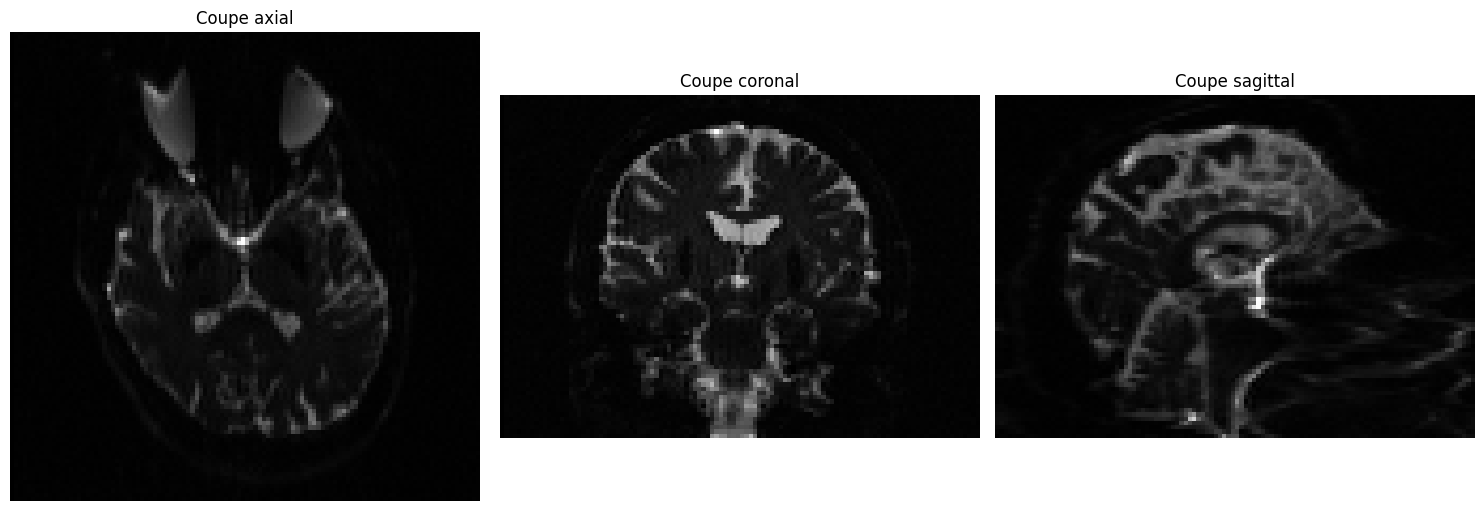


Matrice affine :
[[ -2.      0.     -0.    119.762]
 [ -0.      2.     -0.    -83.18 ]
 [  0.      0.      2.    -90.13 ]
 [  0.      0.      0.      1.   ]]
Dimensions (voxels) : [112 112  80]
Taille des voxels (mm) : [2. 2. 2.]
Ordre des axes : LAS
Type de données : int16
Statistiques des intensités :
(np.int64(1003520), np.int64(994434), np.float64(123.79), np.float64(242.76), np.float64(42.0), np.float64(61.0), np.int16(4095), np.int16(1))
Dimension 4D (nombre de volumes) : 24

Fichier : data/bids/dwi/sub-X_ses-Y_run-01_dwi.nii.gz


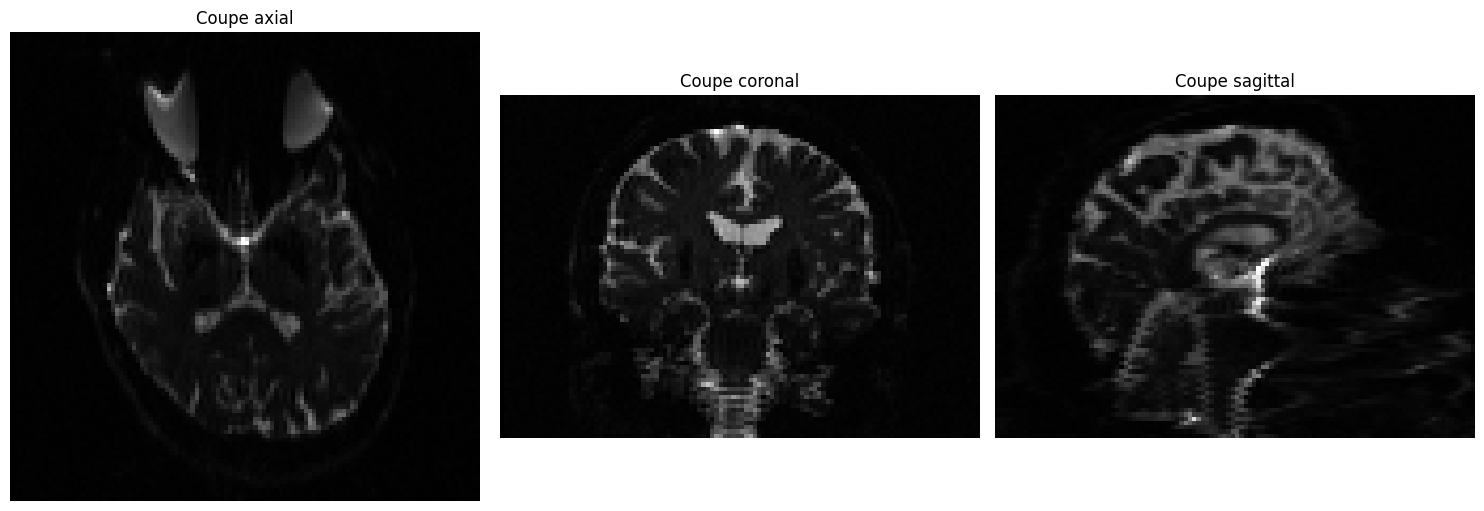


Matrice affine :
[[ -2.      0.     -0.    119.762]
 [ -0.      2.     -0.    -83.18 ]
 [  0.      0.      2.    -90.13 ]
 [  0.      0.      0.      1.   ]]
Dimensions (voxels) : [112 112  80]
Taille des voxels (mm) : [2. 2. 2.]
Ordre des axes : LAS
Type de données : int16
Statistiques des intensités :
(np.int64(1003520), np.int64(994434), np.float64(122.006), np.float64(241.704), np.float64(42.0), np.float64(57.0), np.int16(4095), np.int16(1))
Dimension 4D (nombre de volumes) : 24

Fichier : data/bids/swi/sub-X_ses-Y_swi.nii.gz


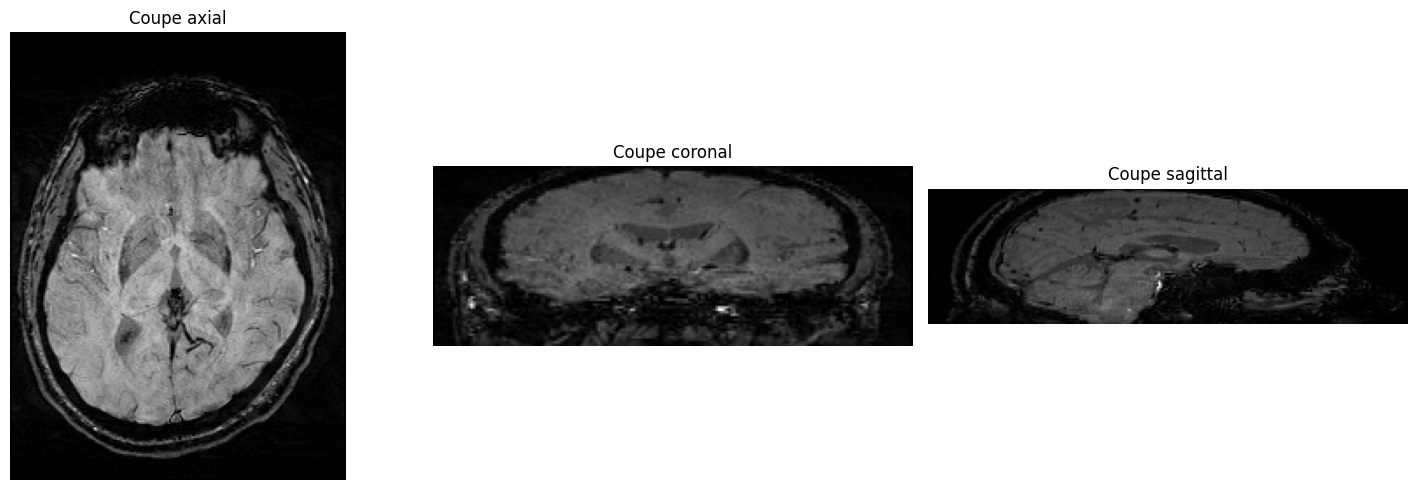


Matrice affine :
[[   0.896    0.051   -0.109  -77.211]
 [  -0.061    0.873   -0.451  -58.106]
 [   0.036    0.205    1.945 -111.328]
 [   0.       0.       0.       1.   ]]
Dimensions (voxels) : [192 256  72]
Taille des voxels (mm) : [0.898 0.898 2.   ]
Ordre des axes : RAS
Type de données : int16
Statistiques des intensités :
(np.int64(3538944), np.int64(3109993), np.float64(62.921), np.float64(73.611), np.float64(20.0), np.float64(124.0), np.int16(708), np.int16(1))

Fichier : data/bids/swi/sub-X_ses-Y_minIP.nii.gz
Statistiques des intensités :
(np.int64(3538944), np.int64(3109993), np.float64(62.921), np.float64(73.611), np.float64(20.0), np.float64(124.0), np.int16(708), np.int16(1))

Fichier : data/bids/swi/sub-X_ses-Y_minIP.nii.gz


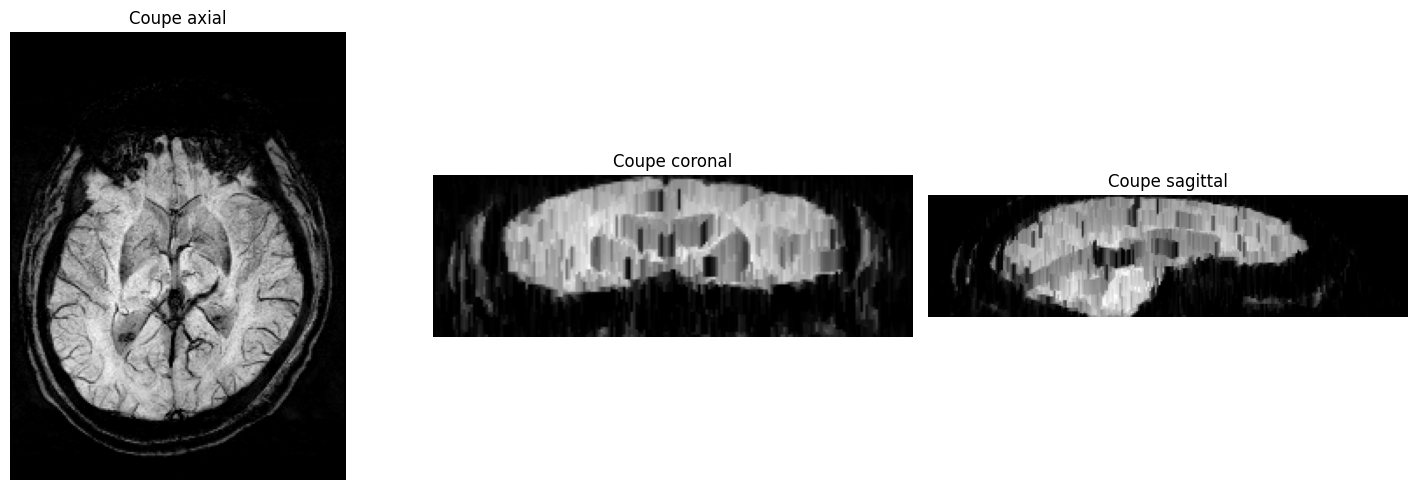


Matrice affine :
[[   0.896    0.051   -0.109  -77.592]
 [  -0.061    0.873   -0.451  -59.685]
 [   0.036    0.205    1.945 -104.519]
 [   0.       0.       0.       1.   ]]
Dimensions (voxels) : [192 256  65]
Taille des voxels (mm) : [0.898 0.898 2.   ]
Ordre des axes : RAS
Type de données : int16
Statistiques des intensités :
(np.int64(3194880), np.int64(1769644), np.float64(60.405), np.float64(66.692), np.float64(19.0), np.float64(126.0), np.int16(245), np.int16(1))
Statistiques des intensités :
(np.int64(3194880), np.int64(1769644), np.float64(60.405), np.float64(66.692), np.float64(19.0), np.float64(126.0), np.int16(245), np.int16(1))


In [2]:
# Parcourir tous les fichiers du répertoire courant et ses sous-dossiers
# topdown=False explore les dossiers enfants d'abord
for root, dirs, files in os.walk("data/", topdown=False):
    for filename in files:
        filepath = os.path.join(root, filename)
        base, ext = split_name_with_nii(filepath)
        
        # Traiter seulement les fichiers NIfTI
        if ext in ['.nii', '.nii.gz']:
            print(f"\n{'='*50}")
            print(f"Fichier : {filepath}")
            
            # Charger le fichier NIfTI
            img_nifti = nib.load(filepath)
            img_data = get_nifti_data(img_nifti)
            
            # Si l'image est 4D (par exemple, données de diffusion),
            # prendre seulement le premier volume
            if img_data.ndim > 3:
                last_dim = img_data.shape[-1]
                img_data = img_data[..., 0]
            else:
                last_dim = 0
            
            # Extraire les informations du header NIfTI
            affine_matrix, dimensions, voxel_sizes, voxel_order = \
                get_nifti_header_info(img_nifti)
            
            # Créer une figure avec 3 coupes (axial, coronal, sagittal)
            fig, axs = plt.subplots(1, 3, figsize=(15, 5))
            
            # Afficher une coupe pour chaque orientation
            for i, axis_name in enumerate(['axial', 'coronal', 'sagittal']):
                slice_data = get_slice(img_data, axis_name)
                axs[i].imshow(slice_data, cmap='gray')
                axs[i].set_title(f"Coupe {axis_name}")
                axs[i].axis('off')
            
            fig.tight_layout()
            plt.show()
            
            # Afficher les métadonnées
            print(f"\nMatrice affine :\n{np.round(affine_matrix, 3)}")
            print(f"Dimensions (voxels) : {dimensions}")
            print(f"Taille des voxels (mm) : {np.round(voxel_sizes, 3)}")
            print(f"Ordre des axes : {voxel_order}")
            print(f"Type de données : {img_data.dtype}")
            print(f"Statistiques des intensités :\n{summarize_intensities(img_data)}")
            
            # Afficher si c'est une image 4D
            if last_dim:
                print(f"Dimension 4D (nombre de volumes) : {last_dim}")
            
            print(f"{'='*50}")

---

## Résumé

- Les fichiers **NIfTI** contiennent des images volumétriques 3D ou 4D
- La **matrice affine** définit la transformation spatiale en coordonnées réelles
- Les **voxels** ont des tailles (résolutions) différentes selon les axes
- La **navigation récursive** permet de découvrir automatiquement tous les fichiers
- La **visualisation multi-plan** révèle la structure complète des données

Prochain chapitre : `h_cell_counting.ipynb`